In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from PIL import Image
from skimage.morphology import binary_dilation, area_closing, binary_erosion
from tqdm.notebook import tqdm
from scipy.ndimage import binary_fill_holes, zoom
from joblib import Parallel, delayed

Image.MAX_IMAGE_PIXELS = None

ix = 0

r= Path('/hpc/dla_patho/premium')

overlays = sorted(list(Path('/hpc/dla_patho/premium/wliu/output_20220518_isala/tif').iterdir()))

ix=0

def extract_patches(overlay_path):

    # os.makedirs(r / 'patches' / overlay_path.stem, exist_ok=True)

    image = np.array(Image.open(overlay_path))
    neoplasm = np.all(image == (255,0,0), axis=-1).astype(int)
    # neoplasm = neoplasm[1536:1536+512,1536:1536+512]

    img = neoplasm
    for step in tqdm(list(range(40)), leave=False, desc='dilating'):
        img = binary_dilation(img)

    img = area_closing(img)
    for step in tqdm(list(range(80)), leave=False, desc='eroding'):
        img = binary_erosion(img)

    img = area_closing(img)

    img = zoom(img, 1/8, order=0)

    Image.fromarray(img).save(r / 'rens' / 'tumor_masks' / (overlay_path.stem + '.tif'))

Parallel(n_jobs=-1)(
    delayed(extract_patches)(overlay) 
    for overlay in tqdm(overlays)
)
# extract_patches(overlays[0])

In [12]:
!jupyter nbextension enable --py widgetsnbextension


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
Exception ignored in: <function Application.__del__ at 0x7ff452ad2a70>
Traceback (most recent call last):
  File "/hpc/dla_patho/premium/rens/miniconda3/envs/rens/lib/python3.10/site-packages/traitlets/config/application.py", line 955, in __del__
  File "/hpc/dla_patho/premium/rens/miniconda3/envs/rens/lib/python3.10/site-packages/traitlets/config/application.py", line 945, in close_handlers
  File "/hpc/dla_patho/premium/rens/miniconda3/envs/rens/lib/python3.10/site-packages/traitlets/traitlets.py", line 683, in __get__
  File "/hpc/dla_patho/premium/rens/miniconda3/envs/rens/lib/python3.10/site-packages/traitlets/traitlets.py", line 657, in get
  File "/hpc/dla_patho/premium/rens/miniconda3/envs/rens/lib/python3.10/site-packages/traitlets/traitlets.py", line 1428, in _notify_observers
  File "/hpc/dla_patho/premium/rens/miniconda3/envs/rens/lib/python3.10/site-packages/traitlets/config/application.py",

In [20]:
from skimage.morphology import binary_dilation, area_closing, binary_erosion

img = neoplasm
for step in range(50):
    img = binary_dilation(img)

img = area_closing(img)
for step in range(50):
    img = binary_erosion(img)

# img = binary_closing(img)

In [21]:
dim = 256

selected = []
for x in np.arange(0, 5000, step=dim):
    for y in np.arange(0, 5000, step=dim): 
        patch = img[x:x+dim, y:y+dim]
        if patch.sum().sum() > dim ** 2 * 0.5:
            selected.append((x, y))

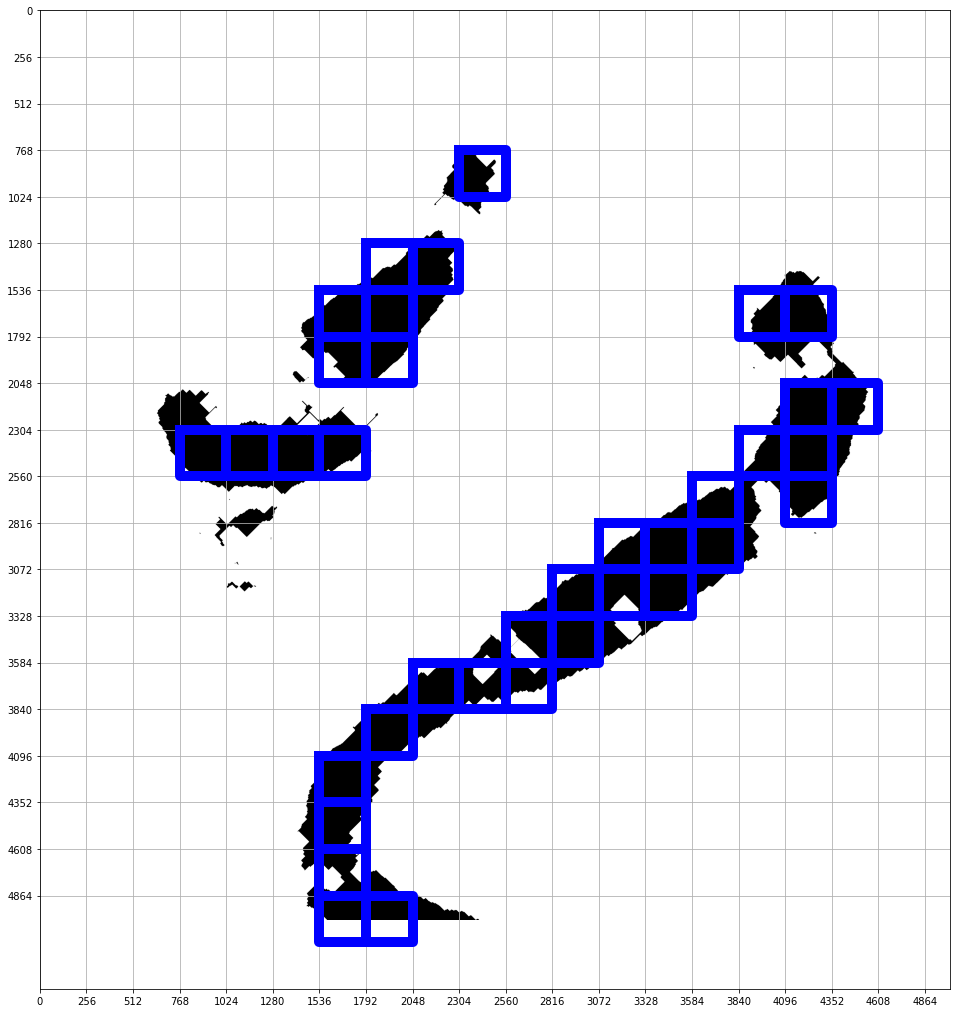

In [22]:
plt.figure(figsize=(18,18))
plt.xticks(np.arange(0, 5000, step=256))
plt.yticks(np.arange(0, 5000, step=256))
plt.imshow(img, cmap='Greys')
plt.grid()
for x,y in selected:
    plt.plot(
        [y,y+dim, y+dim, y, y],
        [x, x, x+dim, x+dim, x],
        c='b',
        lw=10
    )
plt.show()

In [23]:
slide = np.array(Image.open(slides[ix]))
slide = slide[:5000,:5000]

MemoryError: 

In [ ]:
plt.figure(figsize=(18,18))
plt.xticks(np.arange(0, 5000, step=256))
plt.yticks(np.arange(0, 5000, step=256))
plt.imshow(slide)
plt.grid()
# for x,y in selected:
#     plt.plot(
#         [y,y+dim, y+dim, y, y],
#         [x, x, x+dim, x+dim, x],
#         c='b',
#         lw=10
#     )
plt.show()